In [1]:
import sys
import cv2
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from utils.datasets import get_labels
from utils.inference import detect_faces
from utils.inference import draw_text
from utils.inference import draw_bounding_box
from utils.inference import apply_offsets
from utils.inference import load_detection_model
from utils.inference import load_image
from utils.preprocessor import preprocess_input
import os

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
# parameters for loading data and images
#image_path = 'fer2013.csv'
#detection_model_path = 'haarcascade_frontalface_default.xml'
#emotion_model_path = 'fer2013_big_XCEPTION.54-0.66.hdf5'
emotion_model_path = 'Verena_mini_XCEPTION.01-0.24.hdf5'
emotion_labels = get_labels('fer2013')
font = cv2.FONT_HERSHEY_SIMPLEX

# hyper-parameters for bounding boxes shape
emotion_offsets = (20, 40)
#emotion_offsets = (0, 0)

In [4]:
# loading models
#face_detection = load_detection_model(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)

# getting input model shapes for inference
emotion_target_size = emotion_classifier.input_shape[1:3]

In [5]:
emotion_classifier.input_shape
emotion_target_size

(64, 64)

In [114]:
#private test accuracy is 65.62%
#publictest accuaracy is 64.22%

In [64]:
#author's public acc: 65.62%
#author's private acc: 66.84%

In [7]:
#another dataset accuracy
new_img_path = '../../data/TestImgs_48/'

In [8]:
new_faces=[]

for file in os.listdir(new_img_path):
    new_faces.append(cv2.imread(new_img_path+file,0))

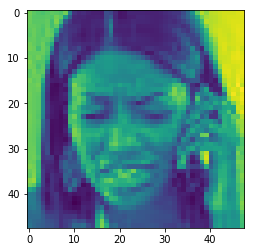

In [9]:
plt.imshow(new_faces[99])

In [10]:
len(new_faces)

256

In [10]:
new_pred_emotions=[]
train_num = int(len(new_faces)*0.8)
for gray_image in new_faces[train_num:]:
    gray_image = gray_image.reshape((48,48))
    gray_image = cv2.resize(gray_image.astype('uint8'), emotion_target_size)
    gray_image.astype('float32')
    gray_image = np.squeeze(gray_image)
    gray_image = preprocess_input(gray_image, True)
    gray_image = np.expand_dims(gray_image, 0)
    gray_image = np.expand_dims(gray_image, -1)
    emotion_label_arg = np.argmax(emotion_classifier.predict(gray_image))
    new_pred_emotions.append(emotion_label_arg)

In [11]:
#new_pred_emotions

In [14]:
new_dataset_labels=pd.read_csv('../../data/label.csv',delimiter=',',header=None)

In [15]:
new_dataset_labels = new_dataset_labels.as_matrix()

In [16]:
new_dataset_labels = np.squeeze(new_dataset_labels)

In [17]:
new_dataset_labels[:20]

array(['Angry', 'Surprise', 'Happy', 'Sad', 'Angry', 'Neutral', 'Sad',
       'Angry', 'Happy', 'Surprise', 'Happy', 'Angry', 'Sad', 'Sad',
       'Sad', 'Happy', 'Surprise', 'Fear', 'Fear', 'Sad'], dtype=object)

In [18]:
temp_true_labels=[]
for x in new_dataset_labels[train_num:]:
    if x =='Angry':
        temp_true_labels.append(0)
    elif x == 'Disgust':
        temp_true_labels.append(1)
    elif x == 'Fear':
        temp_true_labels.append(2)
    elif x == 'Happy':
        temp_true_labels.append(3)
    elif x == 'Sad':
        temp_true_labels.append(4)
    elif x =='Surprise':
        temp_true_labels.append(5)
    else:
        temp_true_labels.append(6)

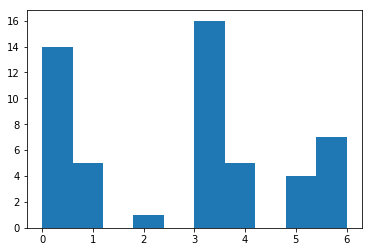

In [19]:
#temp_true_labels
plt.hist(np.array(temp_true_labels))
plt.show()

In [20]:
new_acc = 0
for index, i in enumerate(new_pred_emotions):
    if i == temp_true_labels[index]:
        new_acc = new_acc +1
    else:
        continue


In [21]:
new_acc /= len(new_faces)

In [22]:
print(new_acc) 

0.015625


In [36]:
# authors model to run the test and the acc is 22.95%
# after change the rest emotions into 'neutral' the accuracy is 22.22%

In [23]:
new_pred_emotions[:10]

[4, 6, 4, 4, 0, 4, 6, 6, 4, 4]

In [24]:
temp_true_labels[:10]

[0, 6, 3, 3, 6, 0, 3, 5, 0, 0]